# Government expenditure on education as % of GDP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import statistics

sns.set()

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

 In the following cells, we examine the Government expenditure on education as % of GDP in African Countries for some years. As the given dataset gotten from http://data.un.org/Data.aspx?d=UNESCO&f=series%3aXGDP_FSGOV has values from only the years <b>2000-2014</b>, we shall examine the relationships and trends within this period.

In [2]:
af_countries = [    'Algeria',
                    'Angola',
                    'Benin',
                    'Botswana',
                    'Burkina Faso',
                    'Burundi',
                    'Cameroon',
                    'Cape Verde',
                    'Central African Republic',
                    'Chad',
                    'Comoros',
                    "Côte d'Ivoire",
                    'Democratic Republic of the Congo',
                    'Djibouti',
                    'Egypt',
                    'Equatorial Guinea',
                    'Eritrea',
                    'Eswatini',
                    'Ethiopia',
                    'Gabon',
                    'Gambia',
                    'Ghana',
                    'Guinea',
                    'Guinea-Bissau',
                    'Kenya',
                    'Lesotho',
                    'Liberia',
                    'Libyan Arab Jamahiriya',
                    'Madagascar',
                    'Malawi',
                    'Mali',
                    'Mauritania',
                    'Mauritius',
                    'Morocco',
                    'Mozambique',
                    'Namibia',
                    'Niger',
                    'Nigeria',
                    'Rwanda',
                    'Sao Tome and Principe',
                    'Senegal',
                    'Seychelles',
                    'Sierra Leone',
                    'Somalia',
                    'South Africa',
                    'South Sudan',
                    'Sudan',
                    'Tanzania',
                    'Togo',
                    'Tunisia',
                    'Uganda'
                    'Zambia',
                    'Zimbabwe'
        ]

df   = pd.read_csv('data.csv')
df = df[ (df['Reference Area'].isin(af_countries) )]
df = df.sort_values('Observation Value')
df = df.set_index('Reference Area')
df

,Time Period,Sex,Age group,Units of measurement,Observation Value
Reference Area,,,,,
Democratic Republic of the Congo,1984,Not applicable,Not applicable,Percent,0.70414
Democratic Republic of the Congo,1986,Not applicable,Not applicable,Percent,0.72250
South Sudan,2011,Not applicable,Not applicable,Percent,0.80521
Democratic Republic of the Congo,1988,Not applicable,Not applicable,Percent,0.81484
Democratic Republic of the Congo,1985,Not applicable,Not applicable,Percent,0.82570
...,...,...,...,...,...
Lesotho,1999,Not applicable,Not applicable,Percent,14.16260
Lesotho,2005,Not applicable,Not applicable,Percent,14.79096
Lesotho,2003,Not applicable,Not applicable,Percent,15.61544


From the data set, we observe the following from the columns:  
    Reference Area - Country  
    Time Period - Year  
    Observation Value - Government expenditure on education as % of GDP 

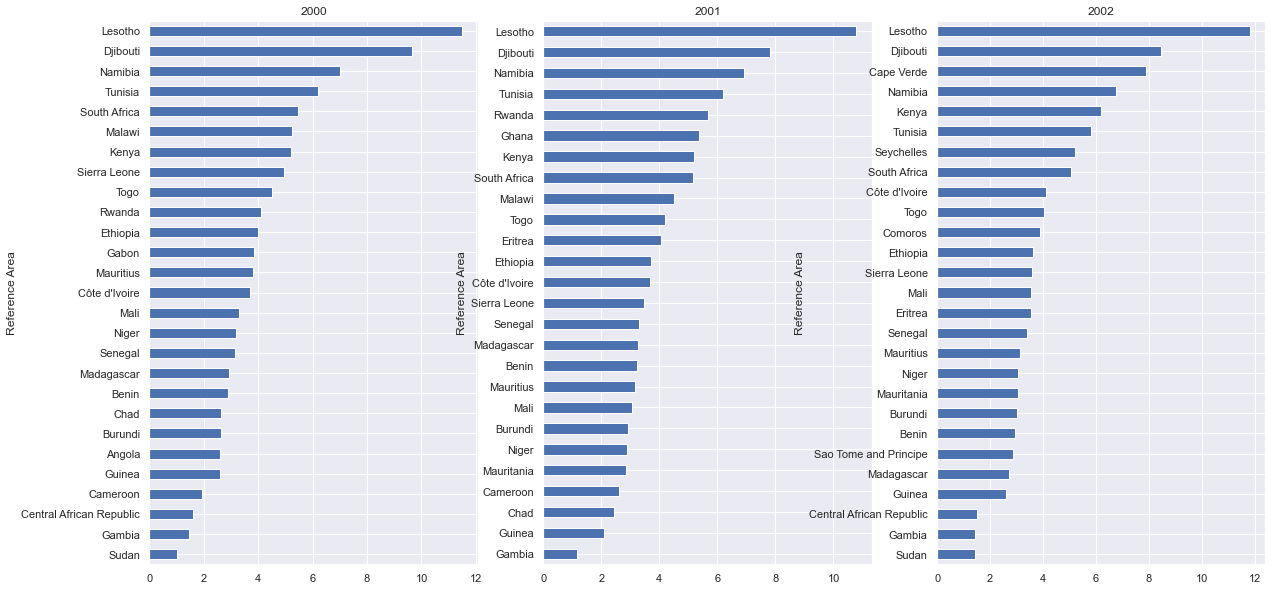

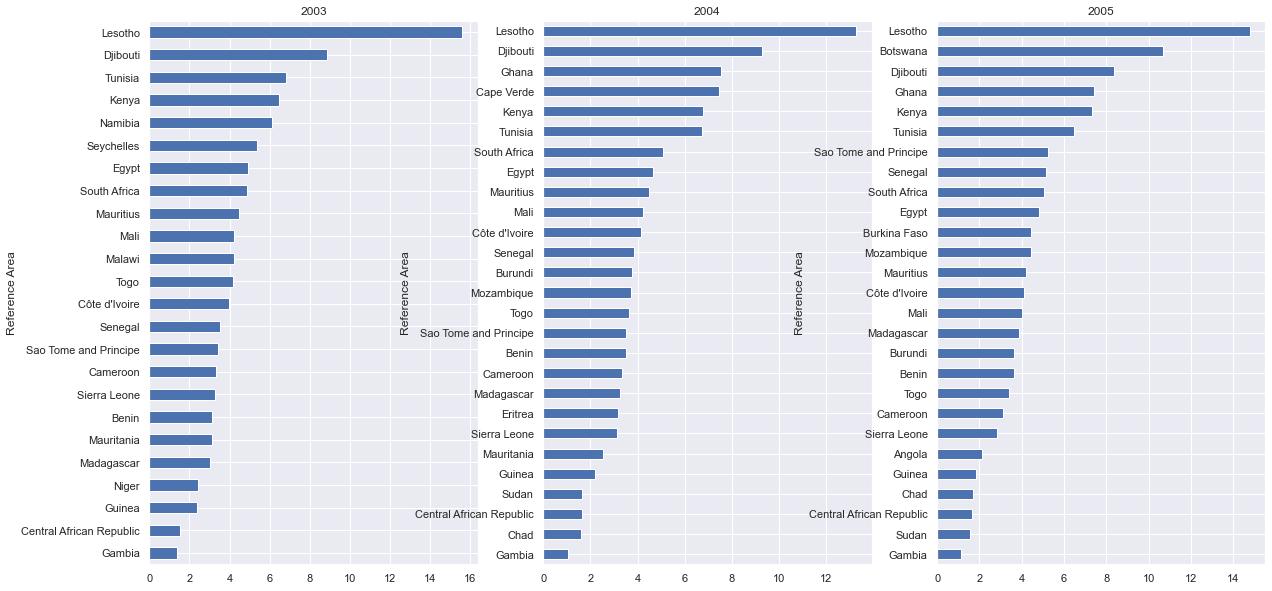

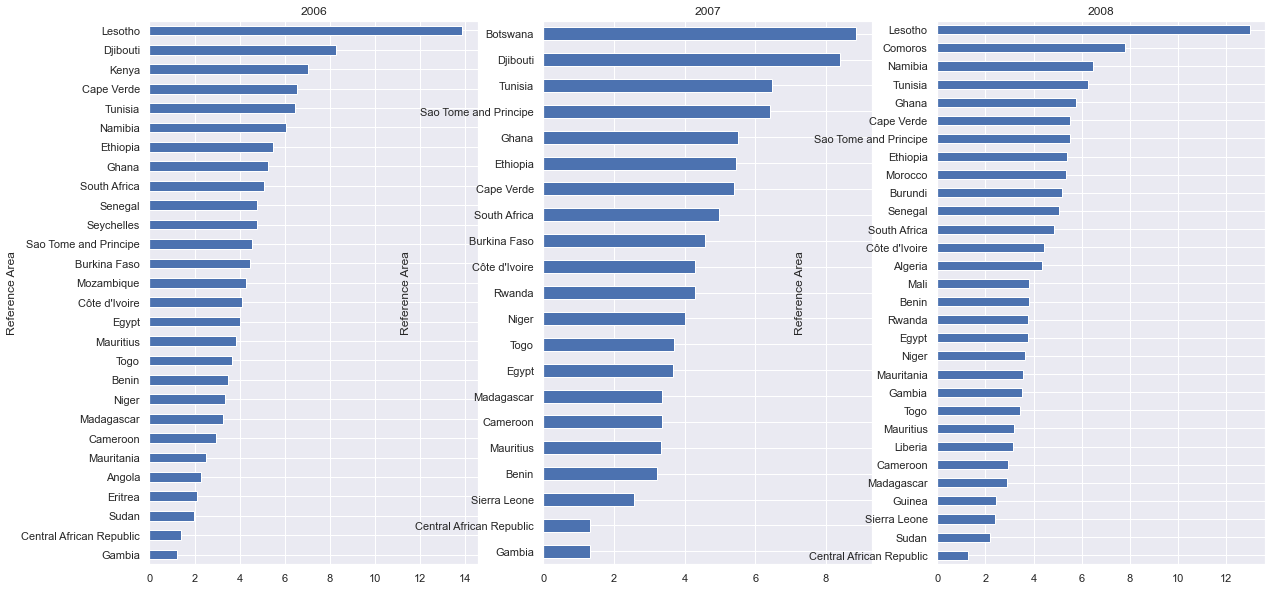

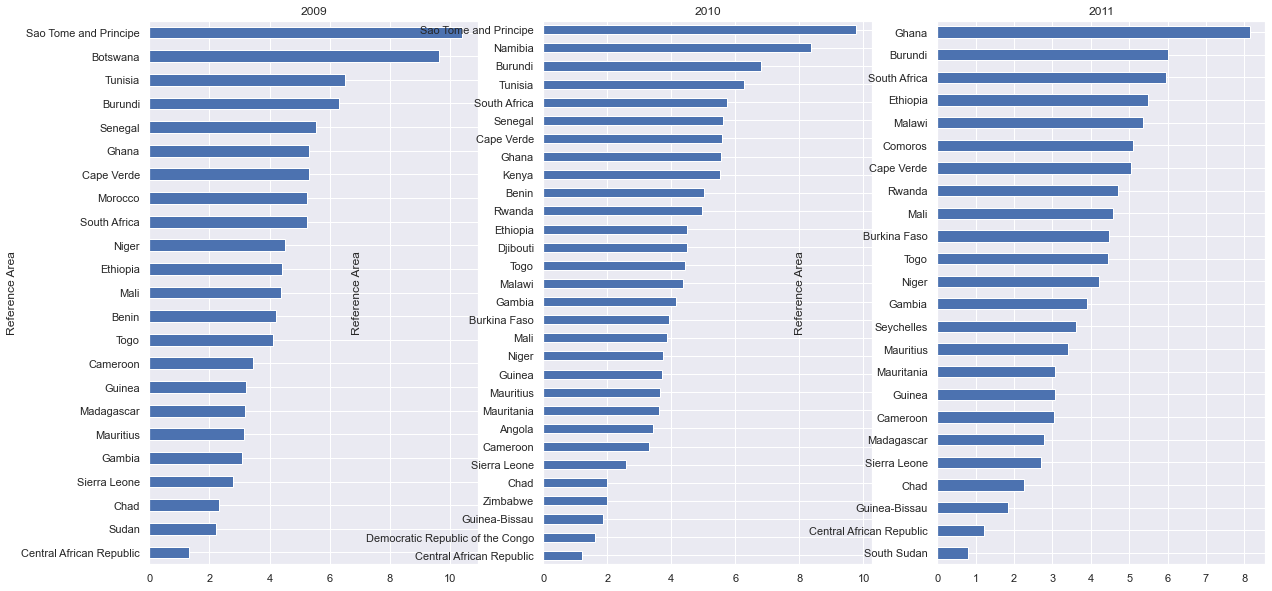

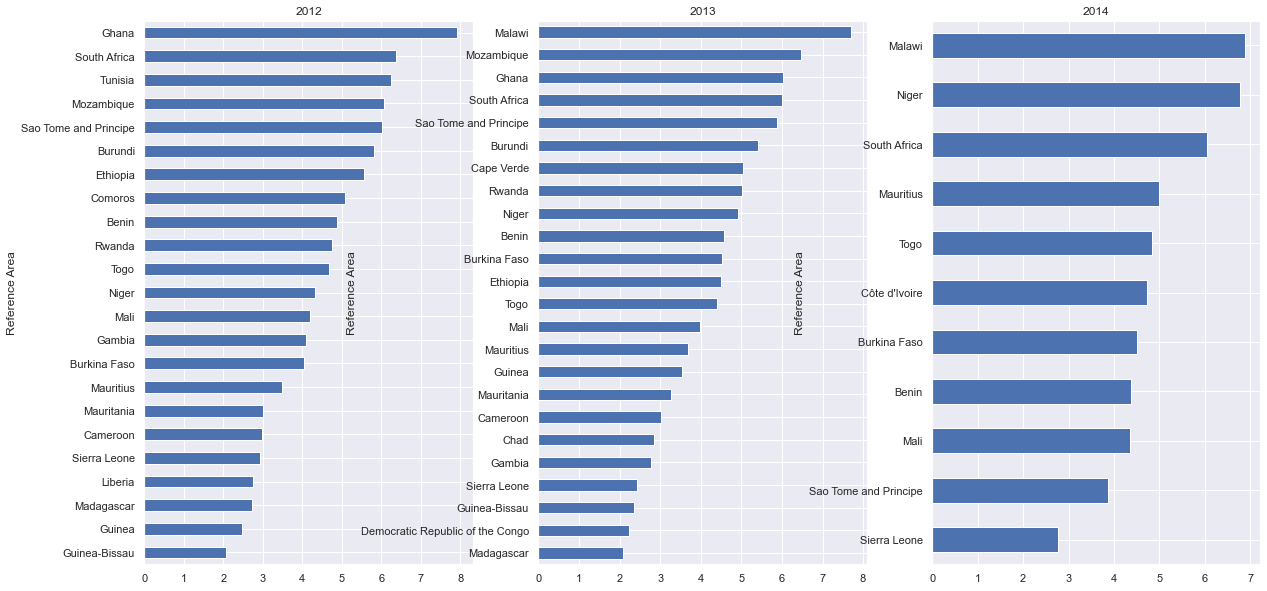

In [3]:
for i in range(5):
    l = 2000+i*3
    h = l + 3
    fig, axes  = plt.subplots(1,3, figsize=(20,10))
 
    for idx, year in enumerate(range(l,h)):
        df[df['Time Period'] == year]['Observation Value'].plot.barh(ax=axes[idx])
        axes[idx].set_title(year)    

## Measures of Dispersion of Observation Values by Year

Here, we visualize the dispersion measures(mean, median, variance ...) for all african countries over the years 2000-2014, so as to see the trend of the <b>Government expenditure on education as % of GDP</b>.

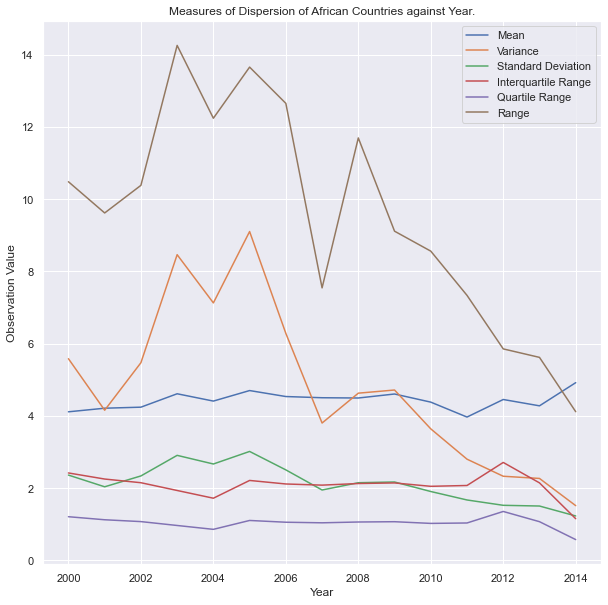

In [4]:
plt.figure(figsize=(10,10))

def interquartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return q3 - q1

def quartile_range(sample):
    q3, q1 = np.percentile(sample, [75 ,25])
    return (q3 - q1)/2

def _range(sample):
    return sample.max() - sample.min()

def create_plot(fn, label):
    ls = []
    for year in range(2000,2015):
            ls.append(fn(df[df['Time Period'] == year]['Observation Value']))
              
    plt.plot(range(2000,2015), ls, label=label)
    plt.title('Measures of Dispersion of African Countries against Year.')
    plt.ylabel('Observation Value')
    plt.xlabel('Year')
    
create_plot(statistics.mean, 'Mean')
create_plot(statistics.variance, 'Variance')
create_plot(statistics.stdev, 'Standard Deviation')
create_plot(interquartile_range, 'Interquartile Range')
create_plot(quartile_range, 'Quartile Range')
create_plot(_range, 'Range')

plt.legend(loc='best')

We can also decide to visualize the median and interquartile ranges with the help of a boxplot. The diagram below helps us understand its structure.

<img align="center" src='https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png' >



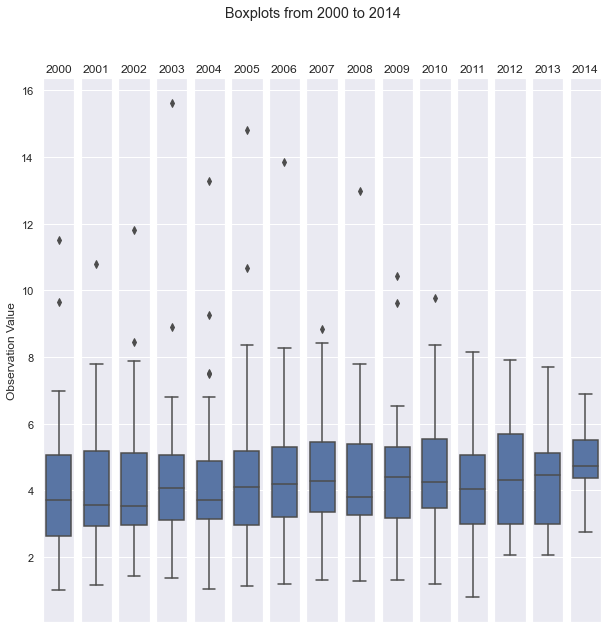

In [5]:
fig, axes  = plt.subplots(1,15, figsize=(10,10), sharey=True)
fig.suptitle('Boxplots from 2000 to 2014')
axes[0].set_ylabel('Observation Value')

for idx, year in enumerate(range(2000,2015)):
    sns.boxplot(ax = axes[idx], y = df[df['Time Period'] == year]['Observation Value'])
    axes[idx].set_title(year)
    if idx > 0: axes[idx].set_ylabel('')
    

